In [11]:
import numpy as np
import pandas as pd

In [12]:
def smape(y_true, y_pred):
    """
    Calculate the Symmetric Mean Absolute Percentage Error (SMAPE).

    Args:
    y_true (array): True values.
    y_pred (array): Predicted values.

    Returns:
    float: SMAPE score.
    """
    # Avoid division by zero by adding a small epsilon
    epsilon = np.finfo(np.float64).eps
    denominator = np.maximum(np.abs(y_true) + np.abs(y_pred) + epsilon, 0.5 + epsilon)

    # Calculate SMAPE
    smape_value = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / denominator)
    return smape_value


In [13]:
a = [ 62.18886,   53.337177,  46.081467,  42.431015,  46.075554,  58.93823,
  78.83022,   97.19235,  108.931725, 106.78115,   99.49789,  91.96594,
  88.39992,   88.40285,   92.3576,   100.86532,  115.73664,  129.50262,
 137.69539,  135.75789,  124.621475, 108.53585,   93.54312,   81.768555]

In [14]:
b = [ 87.3,   85.89 , 85.88 , 83.21,  82.71,  85.44,  86.3 ,  88.,    92. ,  94.89,
  91.28,  90.22 , 87.94 , 87.8,   91.5,  102.87, 115.72, 127.98 ,135.76, 124.47,
 113.51, 102.58 , 92.38 , 87.41]

In [15]:
smape(np.array(a), np.array(b))

16.484813140321155

In [24]:
# 600
c = [ 86.25403 ,  78.87679 ,  70.08055 ,  67.265305,  71.84905 ,
85.07025 , 102.02854 , 111.93429 , 111.18064 , 102.084885,
90.59769 ,  82.56879 ,  78.97533 ,  79.27542 ,  82.88844 ,
90.14197 , 101.748604, 114.093506, 120.36964 , 115.07894 ,
103.72215 ,  90.12669 ,  79.70996 ,  71.48859 ]

In [18]:
smape(np.array(c), np.array(b))

11.95788174883775

In [25]:
# 1000
d = [ 74.04164 ,  65.5368  ,  54.252663,  46.281754,  46.92543 ,  60.165234,
  82.516136, 104.080124, 114.15776 , 109.41069 ,  96.87125 ,  85.63338,
  79.4908  ,  79.382965,  84.12707 ,  95.290474, 112.038055, 127.929756,
 134.16985 , 126.32562 , 110.344246,  94.52337 ,  82.9116  ,  76.0923  ]

In [20]:
smape(np.array(d), np.array(b))

15.887600041227167

In [26]:
# 1500
e = [ 58.653824 , 44.076683 , 32.100403 , 26.180534 , 25.70488  , 30.932945,
  45.63038  , 69.262634 , 88.90317  , 90.453995 , 74.510376 , 52.726295,
  35.913834 , 26.99482  , 25.00016  , 33.47603  , 55.81622  , 83.97555,
 103.13978  ,105.43277  , 93.42175  , 74.18145  , 56.946636 , 43.103302]

In [27]:
smape(np.array(e), np.array(b))

58.012169971387664

In [3]:
from ESRNN.m4_data import *
from ESRNN.utils_evaluation import evaluate_prediction_owa
from ESRNN.utils_visualization import plot_grid_prediction

In [4]:
from statsforecast import StatsForecast

c:\Users\sonng\anaconda3\envs\tsff_env\lib\site-packages\statsforecast\core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [6]:
X_train_df, y_train_df, X_test_df, y_test_df = prepare_m4_data(dataset_name="Hourly",
                                                               directory="../../data/M4",
                                                               num_obs=414)

In [7]:
y_train_df

,unique_id,ds,y
0,H1,1970-01-01 00:00:00,605.0
1,H1,1970-01-01 01:00:00,586.0
2,H1,1970-01-01 02:00:00,586.0
3,H1,1970-01-01 03:00:00,559.0
4,H1,1970-01-01 04:00:00,511.0
...,...,...,...
353495,H99,1970-01-29 23:00:00,27926.0
353496,H99,1970-01-30 00:00:00,26744.0
353497,H99,1970-01-30 01:00:00,25829.0
353498,H99,1970-01-30 02:00:00,25421.0


In [13]:
y_train_df['y'].describe()

count    353500.000000
mean       5606.169408
std       35495.304697
min          10.000000
25%          18.100000
50%          29.000000
75%         497.000000
max      703008.000000
Name: y, dtype: float64

In [18]:
df_elec = pd.read_csv('../../data/electricity/df_electricity_full_2023.csv')

In [34]:
df_elec

,datetime,datetime_utc,date,day,month,year,hour_index,day_of_week,price_de,price_de_lag_24,...,gen_at,gen_at_lag_24,gen_fr,gen_fr_lag_24,windoff_de,windoff_de_lag_24,windon_de,windon_de_lag_24,solar_de,solar_de_lag_24
0,2022-11-01 00:00:00+01,2022-10-31 23:00:00+00:00,2022-11-01,1,11,2022,0,1,80.65,129.38,...,4079.2,2991.0,40284.0,36238.0,5331.8525,2384.8325,16063.7425,6744.5025,0.0,0.0
1,2022-11-01 01:00:00+01,2022-11-01 00:00:00+00:00,2022-11-01,1,11,2022,1,1,76.68,119.09,...,4027.1,2942.3,39246.0,36353.5,5206.9600,2536.8800,16839.0400,6414.3500,0.0,0.0
2,2022-11-01 02:00:00+01,2022-11-01 01:00:00+00:00,2022-11-01,1,11,2022,2,1,55.26,116.32,...,3933.9,2940.3,39366.5,36030.0,5295.7975,2461.7675,17616.8775,5744.3775,0.0,0.0
3,2022-11-01 03:00:00+01,2022-11-01 02:00:00+00:00,2022-11-01,1,11,2022,3,1,37.00,114.60,...,3766.6,2869.9,37003.5,35798.5,5410.9475,2317.1050,17984.3850,5127.0875,0.0,0.0
4,2022-11-01 04:00:00+01,2022-11-01 03:00:00+00:00,2022-11-01,1,11,2022,4,1,38.76,115.07,...,3585.8,2988.1,34949.5,36479.0,5552.2900,2176.6850,18902.0375,4400.1125,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9017,2023-11-11 19:00:00+01,2023-11-11 18:00:00+00:00,2023-11-11,11,11,2023,19,5,124.47,123.58,...,8844.4,7268.6,58571.0,63410.5,604.6600,1353.7825,13020.1300,15818.6625,0.0,0.0
9018,2023-11-11 20:00:00+01,2023-11-11 19:00:00+00:00,2023-11-11,11,11,2023,20,5,113.51,112.93,...,7819.3,6770.3,57140.0,61559.0,562.8825,1213.2200,12936.2600,15185.0900,0.0,0.0
9019,2023-11-11 21:00:00+01,2023-11-11 20:00:00+00:00,2023-11-11,11,11,2023,21,5,102.58,105.10,...,7267.9,6173.9,56443.0,59780.5,491.2300,1110.4750,12595.2525,14189.9350,0.0,0.0
9020,2023-11-11 22:00:00+01,2023-11-11 21:00:00+00:00,2023-11-11,11,11,2023,22,5,92.38,103.97,...,7076.6,5898.0,56775.5,58930.5,425.3300,1046.8000,12039.9400,13123.5375,0.0,0.0


In [30]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9022 entries, 0 to 9021
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           9022 non-null   object 
 1   datetime_utc       9022 non-null   object 
 2   date               9022 non-null   object 
 3   day                9022 non-null   int64  
 4   month              9022 non-null   int64  
 5   year               9022 non-null   int64  
 6   hour_index         9022 non-null   int64  
 7   day_of_week        9022 non-null   int64  
 8   price_de           9022 non-null   float64
 9   price_de_lag_24    9022 non-null   float64
 10  price_de_lag_48    9022 non-null   float64
 11  price_de_lag_168   9022 non-null   float64
 12  price_de_lag_336   9022 non-null   float64
 13  price_de_avg_24    9022 non-null   float64
 14  price_de_avg_168   9022 non-null   float64
 15  price_at           9022 non-null   float64
 16  price_at_lag_24    9022 

In [20]:
df_elec['price_de'].describe()

count    9022.000000
mean      116.178302
std        81.735489
min      -500.000000
25%        80.292500
50%       102.995000
75%       135.192500
max       665.010000
Name: price_de, dtype: float64

In [21]:
df_elec['price_at'].describe()

count    9022.000000
mean      126.321331
std        80.809788
min      -500.000000
25%        87.030000
50%       109.990000
75%       145.460000
max       665.010000
Name: price_at, dtype: float64

In [22]:
df_elec['price_fr'].describe()

count    9022.000000
mean      120.953198
std        84.157958
min      -134.940000
25%        80.342500
50%       104.535000
75%       140.955000
max       753.000000
Name: price_fr, dtype: float64

In [24]:
df_elec['load_de'].describe()

count     9022.000000
mean     53550.607719
std       9434.099212
min      30852.302500
25%      45996.993125
50%      53615.243750
75%      60704.920625
max      74109.175000
Name: load_de, dtype: float64

In [25]:
df_elec['load_at'].describe()

count    9022.000000
mean     6647.677012
std      1238.682559
min      4031.000000
25%      5638.000000
50%      6642.000000
75%      7458.000000
max      9721.000000
Name: load_at, dtype: float64

In [26]:
df_elec['load_fr'].describe()

count     9022.000000
mean     48695.479605
std      10595.884856
min      27650.000000
25%      41000.000000
50%      46950.000000
75%      54500.000000
max      82650.000000
Name: load_fr, dtype: float64

In [27]:
df_elec['gen_de'].describe()

count     9022.000000
mean     51524.085071
std      12145.087168
min      20071.640000
25%      42771.382500
50%      52026.570000
75%      60546.645000
max      87192.400000
Name: gen_de, dtype: float64

In [28]:
df_elec['gen_at'].describe()

count     9022.000000
mean      5984.557803
std       1641.248734
min          0.000000
25%       4787.300000
50%       5792.500000
75%       7036.725000
max      11721.000000
Name: gen_at, dtype: float64

In [29]:
df_elec['gen_fr'].describe()

count     9022.000000
mean     51109.544779
std       7218.835689
min      32064.000000
25%      46195.500000
50%      50291.500000
75%      54995.875000
max      76870.000000
Name: gen_fr, dtype: float64

In [31]:
df_elec['windoff_de'].describe()

count    9022.000000
mean     2707.849995
std      1745.333771
min        35.667500
25%      1053.775000
50%      2614.428750
75%      4280.626250
max      6436.207500
Name: windoff_de, dtype: float64

In [32]:
df_elec['windon_de'].describe()

count     9022.000000
mean     12718.298189
std       9608.129376
min        207.192500
25%       4759.223750
50%      10199.711250
75%      18561.564375
max      43148.832500
Name: windon_de, dtype: float64

In [33]:
df_elec['solar_de'].describe()

count     9022.000000
mean      6310.253393
std       9781.155145
min          0.000000
25%          0.000000
50%        218.741250
75%       9807.117500
max      41518.442500
Name: solar_de, dtype: float64

C:\Users\sonng\AppData\Local\Temp\ipykernel_25496\1681383372.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_elec.corr()


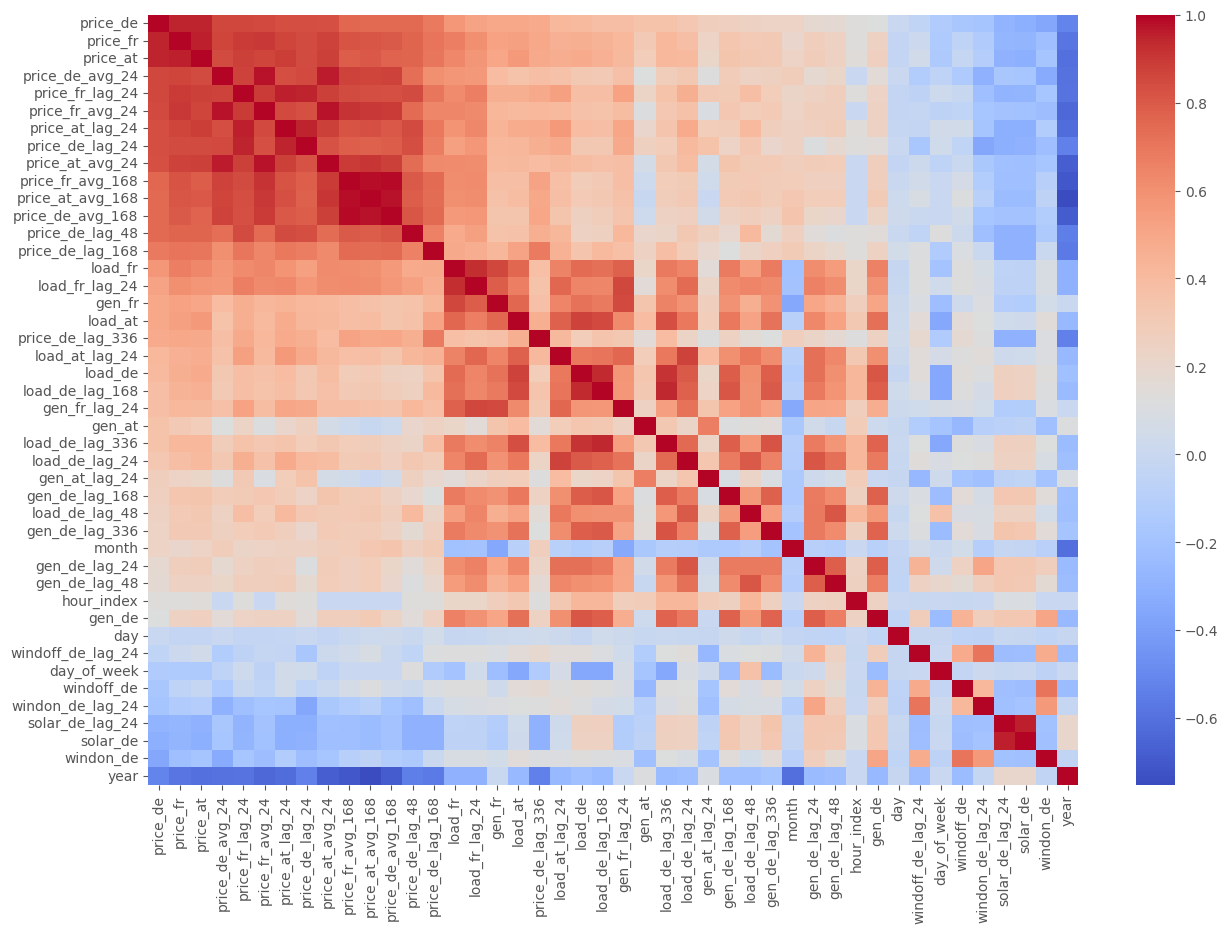

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Calculate pairwise correlation
corr_matrix = df_elec.corr()

# Sort based on correlation with German electricity price
# Replace 'german_price' with the actual column name of the German electricity price
sorted_corr = corr_matrix.sort_values(by='price_de', axis=0, ascending=False)
sorted_corr = sorted_corr.sort_values(by='price_de', axis=1, ascending=False)

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(sorted_corr, annot=False, cmap='coolwarm')
# plt.title('Correlation Heatmap Sorted by German Electricity Price Correlation')
plt.show()